Lớp **Lập trình cho Khoa học dữ liệu - 17_21**  
Học kì II, 2019 - 2020  

<hr>
<br>
<center><b><font size="10">ĐỒ ÁN CUỐI KÌ</font></b></center>
<br>
<center>
    <font size="4"><b>Sinh viên thực hiện:</b></font>
    <br> Trần Minh Trí - 1712834<br>
</center>
<hr>

# I. Chủ đề quan tâm

<font size="4.5">  Tại sao Mỹ, một đất nước phát triển với nền tảng khoa học và cơ sở hạ tầng y tế tiên tiến hàng đầu thế giới lại đứng top 1 về số ca nhiễm và tử vong bởi **covid 19**? </font>

## 1. Giả thuyết về chủ đề

### Một số thông tin về tình hình ở Mỹ trước khi dịch bùng phát 

Ca nhiễm covid 19 đầu tiên được phát hiện vào ngày **21/1**

Tổng thống Donald Trump ban bố tình trạng khẩn cấp quốc gia về covid 19 vào ngày **13/3**.

Trích [The Washington Post](https://www.washingtonpost.com/national-security/2020/04/04/coronavirus-government-dysfunction/?arc404=true): **The U.S. was beset by denial and dysfunction as the coronavirus raged** (04/04/2020)
- Các thông tin cơ bản về virus corona không được thông báo đến Trump bởi các quan chức y tế cho đến 18/1. Cùng lúc đó, Trump đang đấu tranh trước các cáo buộc cưỡng chế chính trị đối với Ukraine. 

- Alex Azar, U.S. Serectary of Health and Human Services, kiềm chế không gây áp lực với tổng thống và thay vào đó, ông bảo Trump rằng "tình hình hiện tại đang được giám sát và đánh giá"

Trích [The New York Times](https://www.nytimes.com/2020/04/11/us/politics/coronavirus-trump-response.html): **He Could Have Seen What Was Coming: Behind Trump’s Failure on the Virus** (11/4/2020)
 - Những phản ứng với virus corona của Trump trong khoảng thời gian bị cáo buộc đã bị làm mờ bởi những nghi ngờ và khinh bỉ. Đối với ông, nhiều chuyên gia và quan chức có năng lực thuộc phe đối lập. 
 - Ông còn gọi dịch bệnh này là một "trò bịp" của phe Dân Chủ. Speaker of the House Nancy Pelosi ngược lại gọi phản hồi của chính quyền Trump trước cuộc khủng hoảng là mờ mịt và hỗn loạn

### Giả thuyết:

Mâu thuẫn chính trị dẫn đến mâu thuẫn trong việc tuyên truyền thông tin về mối nguy hiểm của covid-19 và các biện pháp phòng tránh. Ví dụ về những mâu thuẫn: Vào thời điểm đầu của sự bùng phát những tuyên truyền như "tất cả đều trong tầm kiểm soát", "vài tháng sau nó sẽ tự biến mất", ... và những chỉ trích đối với đảng cầm quyền bị xem nhẹ là sự lừa đảo bởi đảng đối lập ([Nguồn](https://www.youtube.com/watch?v=2eB_xCk5ABw))

Kết quả là một bộ phận đông người dân thờ ơ trước đại dịch, đã đến dịch bệnh bùng phát (Nên nhớ đảng cầm quyền là đảng có số phiếu bầu, sự tin tưởng chiếm phần lớn trong toàn bộ dân số)

## 2. Các câu hỏi cần trả lời:

Ta đặt các câu hỏi cần thiết ủng hộ cho giả thuyết

 1. Sự bùng phát dịch bệnh ở Mỹ xảy ra như thế nào? (Số lượng nhiễm qua từng tháng, từ số suy ra khoảng thời gian bùng phát)
 2. Liệu bất ổn chính trị ở Mỹ có ảnh hưởng đến sự bùng phát dịch bệnh?
 3. Đưa ra dẫn chứng về bất ổn chính trị ở Mỹ ảnh hưởng đến sự lây lan của dịch bệnh

# II. Thu thập dữ liệu

Để có một bộ dữ liệu liên quan đến covid 19, ta tìm trên kaggle và tìm được [bộ dữ liệu sau](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset) (file "covid_19_data.csv")

### Về bộ dữ liệu trên:
<b><font size="3"> Courtesy: </font></b> [An interactive web-based dashboard to track COVID-19 in real time](https://www.thelancet.com/journals/laninf/article/PIIS1473-3099(20)30120-1/fulltext) - Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE)

<b><font size="3"> License: </font></b> This data set is licensed under the **Creative Commons Attribution 4.0 International (CC BY 4.0)** by the Johns Hopkins University on behalf of its Center for Systems Science in Engineering. Copyright Johns Hopkins University 2020.

<b><font size="3"> Data sources:</font></b> Xem thêm ở [đây](https://github.com/CSSEGISandData/COVID-19)

Ta thu thập thêm dữ liệu về các bang chịu ảnh hưởng lớn về chính trị 2 đảng phái lớn ở Mỹ và thu thập chính sách về việc "Bắt buộc đeo khẩu trang khi ra nơi công cộng" của các bang để xét xem có sự khác biệt. 

Dữ liệu tìm được: [Chính kiến các bang](https://en.wikipedia.org/wiki/2016_United_States_presidential_election) và [Ngày bắt đầu luật bắt buộc đeo khẩu trang các bang](https://edition.cnn.com/2020/06/19/us/states-face-mask-coronavirus-trnd/index.html)

Ta ghi chép dữ liệu này vào file "US_Additional_Info.csv"

# III. Khám phá dữ liệu

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

In [2]:
covid_info = pd.read_csv("covid_19_data.csv", index_col="SNo")
state_info = pd.read_csv("US_Additional_Info.csv")

In [3]:
covid_info.shape

(95284, 7)

In [4]:
covid_info.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
state_info.head()

,State,Must wear mask since,Politic
0,Alabama,15-07-20,Red
1,Alaska,NaN,Red
2,Arizona,NaN,Red
3,Arkansas,20-07-20,Red
4,California,18-06-20,Blue


Ở **covid_info**, ta có cột dữ liệu sau:
 - `ObservationDate`: Ngày mà dữ liệu lưu lại
 - `Province/State`: Tỉnh, khu vực, bang
 - `Country/Region`: Nước/vùng lãnh thổ
 - `Last Update`: Lần update cuối cùng trong ngày ObservationDate
 - `Confirmed`: Số ca nhiễm
 - `Deaths`: Số ca tử vong
 - `Recovered`: Số ca hồi phục

Ở **state_info**, ta có cột dữ liệu:
 - `State`: Tên bang ở Mỹ
 - `Must wear mask since`: Ngày luật bắt buộc đeo khẩu trang có hiệu lực
 - `Politic`: Đảng có ảnh hưởng lớn hơn ở bang này (Red = Republican, Blue = Democratic)

## Tiền xử lí

Ở **covid_info** ta chỉ quan tâm nước Mỹ, nên ta lọc **Country/Region	== US** và đồng thời bỏ cột Country/Region

Ta bỏ qua cột **Last Update**, chỉ chú trọng cột **ObservationDate**

In [6]:
covid_info = covid_info[covid_info["Country/Region"] == "US"].drop(["Last Update", "Country/Region"], axis=1)
covid_info.head()

,ObservationDate,Province/State,Confirmed,Deaths,Recovered
SNo,,,,,
32,01/22/2020,Washington,1.0,0.0,0.0
70,01/23/2020,Washington,1.0,0.0,0.0
118,01/24/2020,Washington,1.0,0.0,0.0
119,01/24/2020,Chicago,1.0,0.0,0.0
159,01/25/2020,Washington,1.0,0.0,0.0


In [7]:
covid_info.dtypes

ObservationDate     object
Province/State      object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

Cần convert **ObservationDate** sang DateTime

In [8]:
covid_info["ObservationDate"] = pd.to_datetime(covid_info["ObservationDate"], format="%m/%d/%Y")

In [9]:
covid_info.dtypes

ObservationDate    datetime64[ns]
Province/State             object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [10]:
state_info.dtypes

State                   object
Must wear mask since    object
Politic                 object
dtype: object

Cần convert **Must wear mask since** sang DateTime

In [11]:
state_info["Must wear mask since"] = pd.to_datetime(state_info["Must wear mask since"], format="%d-%m-%y")

## Miền dữ liệu

In [12]:
covid_info["ObservationDate"].min(), covid_info["ObservationDate"].max()

(Timestamp('2020-01-22 00:00:00'), Timestamp('2020-08-25 00:00:00'))

In [13]:
state_info["Must wear mask since"].min(), state_info["Must wear mask since"].max()

(Timestamp('2020-04-08 00:00:00'), Timestamp('2020-08-11 00:00:00'))

# IV. Sử dụng dữ liệu để trả lời các câu hỏi

## 1. Sự bùng phát dịch bệnh ở Mỹ xảy ra như thế nào? (Mức độ nhiễm qua từng tháng)

In [14]:
info_per_date = covid_info.groupby("ObservationDate").sum()
info_per_date.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,1.0,0.0,0.0
2020-01-23,1.0,0.0,0.0
2020-01-24,2.0,0.0,0.0
2020-01-25,2.0,0.0,0.0
2020-01-26,5.0,0.0,0.0


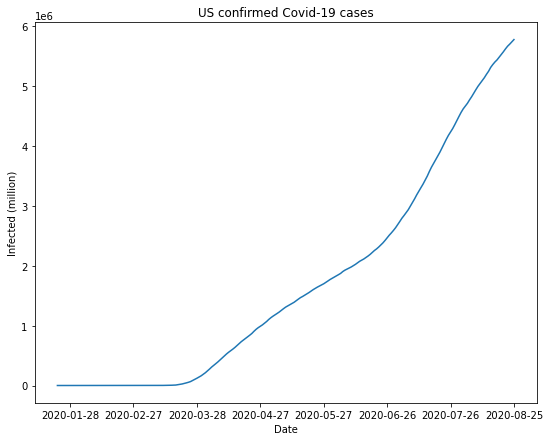

In [15]:
plt.figure(figsize=(9,7))
plt.plot(info_per_date["Confirmed"])

ax = plt.gca()
i = len(info_per_date["Confirmed"].index) - 1
tick = []
while i>=0:
    tick.append(info_per_date["Confirmed"].index[i])
    i-=30
ax.axes.xaxis.set_ticks(tick)

plt.xlabel("Date")
plt.ylabel("Infected (million)")
plt.title("US confirmed Covid-19 cases")
plt.show()

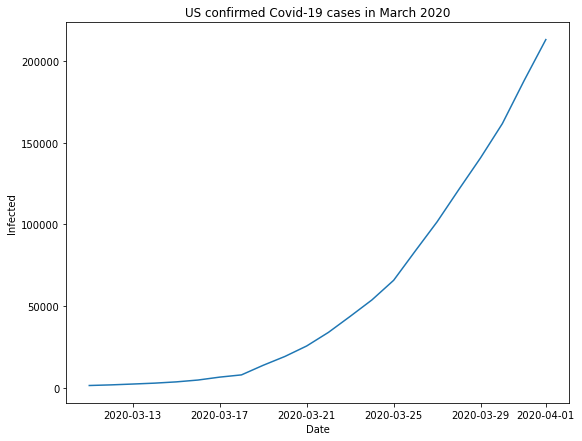

In [16]:
df = info_per_date[info_per_date.index >= "2020-03-11"]
df = df[df.index <= "2020-04-1"]
plt.figure(figsize=(9,7))
plt.plot(df["Confirmed"])
plt.xlabel("Date")
plt.ylabel("Infected")
plt.title("US confirmed Covid-19 cases in March 2020")
plt.show()

Ta thấy được số ca nhiễm dường như tăng đột biết vào khoảng giữa tháng 3, ngay sau khi tình trạng khẩn cấp quốc gia được ban bố nhưng cách ngày phát hiện ca nhiễm đầu tiên đến 2 tháng

Liệu trước đó đã có nhiều người nhiễm nhưng không phát hiện cho tới sau khi tình trạng khẩn cấp quốc gia?

## 2. Liệu bất ổn chính trị ở Mỹ có ảnh hưởng đến sự bùng phát dịch bệnh?

Để trả lời câu hỏi này, ta tìm hiểu mức độ lây nhiễm giữa các bang chịu ảnh hưởng chính trị bởi 2 đảng phái đối lập

Do các đảng phái có chính sách gần như đối lập khác nhau, nếu một phía có mức độ lây nhiễm cao hơn ta có thể kết luận sự bùng phát dịch bệnh một phần do bất ổn chính trị ở thời điểm đó và ngược lại

**Tiền xử lí**: 
 - Ở đây mình sẽ lấy dữ liệu tên các bang thuộc 2 đảng đối lập vào 2 mảng
 - Mỗi mảng tạo thành 2 df, **df_covid_info** là số ca nhiễm của các bang trong mảng đó, **df_covid_rate** là số ca nhiễm mới từng ngày

In [17]:
red_state = state_info[state_info["Politic"] == "Red"]["State"].to_numpy()
red_state

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Florida',
       'Georgia', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Michigan', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Pennsylvania', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [18]:
blue_state = state_info[state_info["Politic"] == "Blue"]["State"].to_numpy()
blue_state

array(['California', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois',
       'Maine', 'Maryland', 'Massachusetts', 'Minnesota', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'Oregon',
       'Rhode Island', 'Vermont', 'Virginia', 'Washington'], dtype=object)

In [19]:
df_covid_info_blue = covid_info[covid_info["Province/State"].isin(blue_state)].groupby("ObservationDate").sum()
df_covid_rate_blue = df_covid_info_blue.diff()

In [20]:
df_covid_info_red = covid_info[covid_info["Province/State"].isin(red_state)].groupby("ObservationDate").sum()
df_covid_rate_red = df_covid_info_red.diff()

Như đã thấy ở câu 1, dữ liệu trước ngày ban bố tình trạng khẩn cấp có vẻ thiếu (?), nên ta bỏ những ngày đó ra (rút ngắn phần không cần thiết trên biểu đồ)

In [21]:
df_covid_info_blue = df_covid_info_blue[df_covid_info_blue.index >= "2020-03-11"]
df_covid_rate_blue = df_covid_rate_blue[df_covid_rate_blue.index >= "2020-03-11"]

df_covid_rate_blue.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-11,223.0,7.0,0.0
2020-03-12,287.0,3.0,4.0
2020-03-13,366.0,6.0,0.0
2020-03-14,298.0,4.0,0.0
2020-03-15,505.0,7.0,0.0


In [22]:
df_covid_info_red = df_covid_info_red[df_covid_info_red.index >= "2020-03-11"]
df_covid_rate_red = df_covid_rate_red[df_covid_rate_red.index >= "2020-03-11"]

df_covid_rate_red.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-11,94.0,1.0,0.0
2020-03-12,95.0,1.0,0.0
2020-03-13,150.0,1.0,0.0
2020-03-14,245.0,3.0,0.0
2020-03-15,257.0,2.0,0.0


Text(0, 0.5, 'New infection')

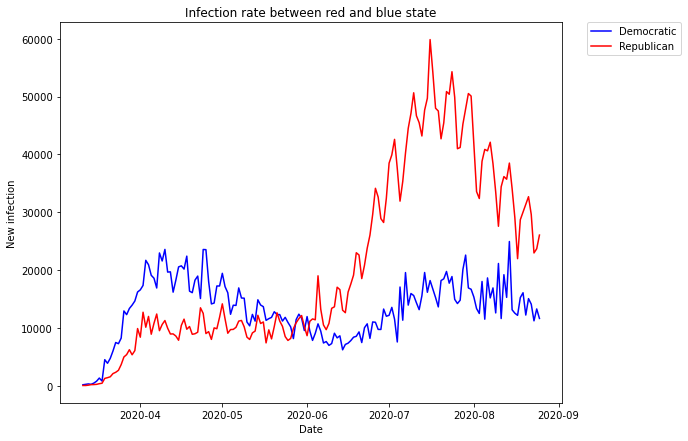

In [23]:
plt.figure(figsize=(9,7))
plt.plot(df_covid_rate_blue["Confirmed"], 'b', label='Democratic')
plt.plot(df_covid_rate_red["Confirmed"], 'r', label='Republican')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Infection rate between red and blue state")
plt.xlabel("Date")
plt.ylabel("New infection")

Text(0, 0.5, 'Infected (million)')

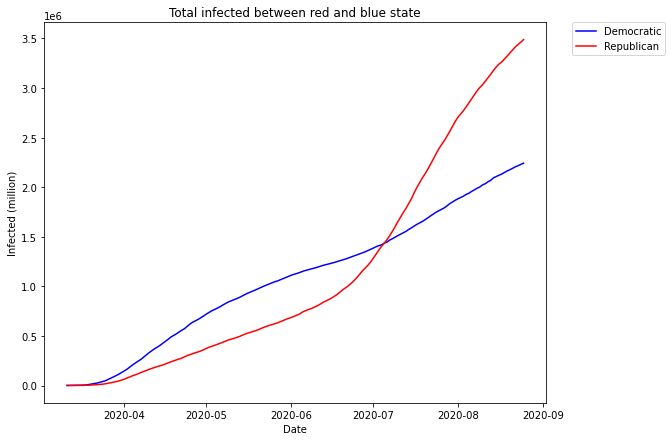

In [24]:
plt.figure(figsize=(9,7))
plt.plot(df_covid_info_blue["Confirmed"], 'b', label='Democratic')
plt.plot(df_covid_info_red["Confirmed"], 'r', label='Republican')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Total infected between red and blue state")
plt.xlabel("Date")
plt.ylabel("Infected (million)")

Ta thấy rõ ràng dù ban đầu phía Democratic có số tốc độ lây nhiễm cao hơn (đỉnh điểm ở tháng 4, 5) nhưng về sau nó đã được khống chế hoàn toàn. Cùng lúc đó phía Republican tăng không kiểm soát đến giữa tháng 7 mới có dấu hiệu sụt giảm nhưng vẫn còn cao

-> Chính sách đối lập của các bang có ảnh hưởng đến sự bùng phát dịch bệnh

## 3. Dẫn chứng về bất ổn chính trị ở Mỹ ảnh hưởng đến sự lây lan của dịch bệnh

Ta cần chỉ ra một sự khác biệt chính sách giữa 2 đảng đối lập chính, ở đây sử dụng ngày bắt đầu ban hành luật "Bắt buộc đeo khẩu trang ở nơi công cộng". Ta xem xét số lượng nhiễm khi luật bắt đầu có hiệu lực, đối với những bang chưa ban hành ta xem như hiện tại là "số lượng nhiễm khi luật bắt đầu"

**Tiền xử lí**:
 - **per_state_info** là df chứa thông tin số ca nhiễm, chết, hồi phục chia ra từng bang
 - **state_info_filled_NaN** được tạo là một copy của **state_info** để fillna = "25-08-20", thực hiện ý >đối với những bang chưa ban hành ta xem như hiện tại là "số lượng nhiễm khi luật bắt đầu"< ở trên. Tạo copy là để khi plot dùng df ban đầu vẫn có thể hiện nan ở những thời gian nan
 - Khi đã có số ngày, tên bang và số ca nhiễm mỗi ngày/bang, thực hiện thêm một cột "Confirmed before" vào **state_info**

In [25]:
per_state_info = covid_info.groupby(["ObservationDate", "Province/State"]).agg("sum").unstack("Province/State")

In [26]:
state_info_filled_NaN = state_info.copy()
state_info_filled_NaN['Must wear mask since'] = state_info_filled_NaN['Must wear mask since'].fillna("25-08-20")

In [27]:
confirmed_at_in_effect_date = []

for i in range(state_info.shape[0]):
    state = state_info_filled_NaN["State"][i]
    in_effect_date = state_info_filled_NaN["Must wear mask since"][i]
    
    in_effect_date = pd.to_datetime(in_effect_date, format="%d-%m-%y")
    
    x = per_state_info[per_state_info.index == in_effect_date]["Confirmed", state]
    
    confirmed_at_in_effect_date.append(x.values[0])
    
state_info["Confirmed before"] = confirmed_at_in_effect_date

In [28]:
state_info.head()

,State,Must wear mask since,Politic,Confirmed before
0,Alabama,2020-07-15,Red,59067.0
1,Alaska,NaT,Red,4843.0
2,Arizona,NaT,Red,199273.0
3,Arkansas,2020-07-20,Red,33927.0
4,California,2020-06-18,Blue,167086.0


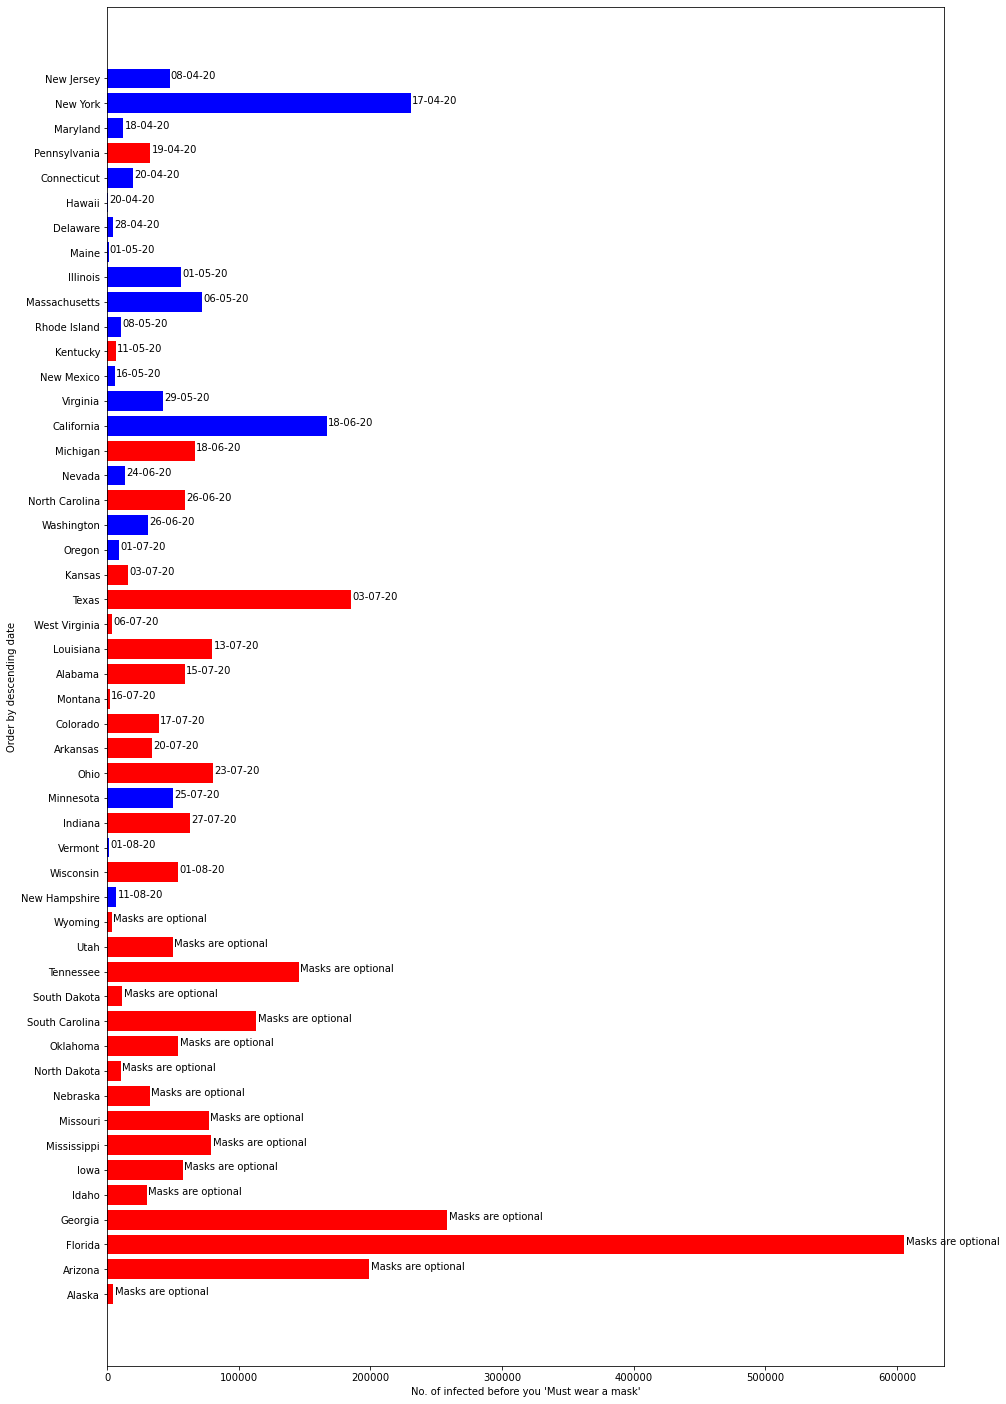

In [29]:
df = state_info.sort_values(by=['Must wear mask since'], ascending=False, na_position="first")
# Đây chỉ là sắp xếp
plt.figure(figsize=(15,25))
plt.barh(df["State"], df["Confirmed before"], color=df["Politic"])
plt.xlabel("No. of infected before you 'Must wear a mask'")
plt.ylabel("Order by descending date")

i = 0
for x in df.index:
    value = df["Confirmed before"][x]
    text = df["Must wear mask since"][x]
    if not pd.isnull(text):
        text = text.strftime("%d-%m-%y")
    else:
        text = "Masks are optional"
    plt.text(value+1000, i, text, color='black')
    i+= 1

plt.show()

Ta thấy toàn bộ các bang Democratic đã có luật ban hành bắt buộc đeo khẩu trang khá sớm trong giai đoạn bùng phát dịch và khi có số lượng nhiễm ít. 

Còn ở các bang Republican, nhiều bang không bắt buộc đeo khẩu trang, đặc biệt ở một số nơi có số ca nhiễm cao như Florida, Georgia, Arizona

**Góp ý Outlier**: Florida có số ca mắc rất lớn, nếu không tính bang Florida thì các khác biệt giữa hai phe có rõ ràng như vậy không ?

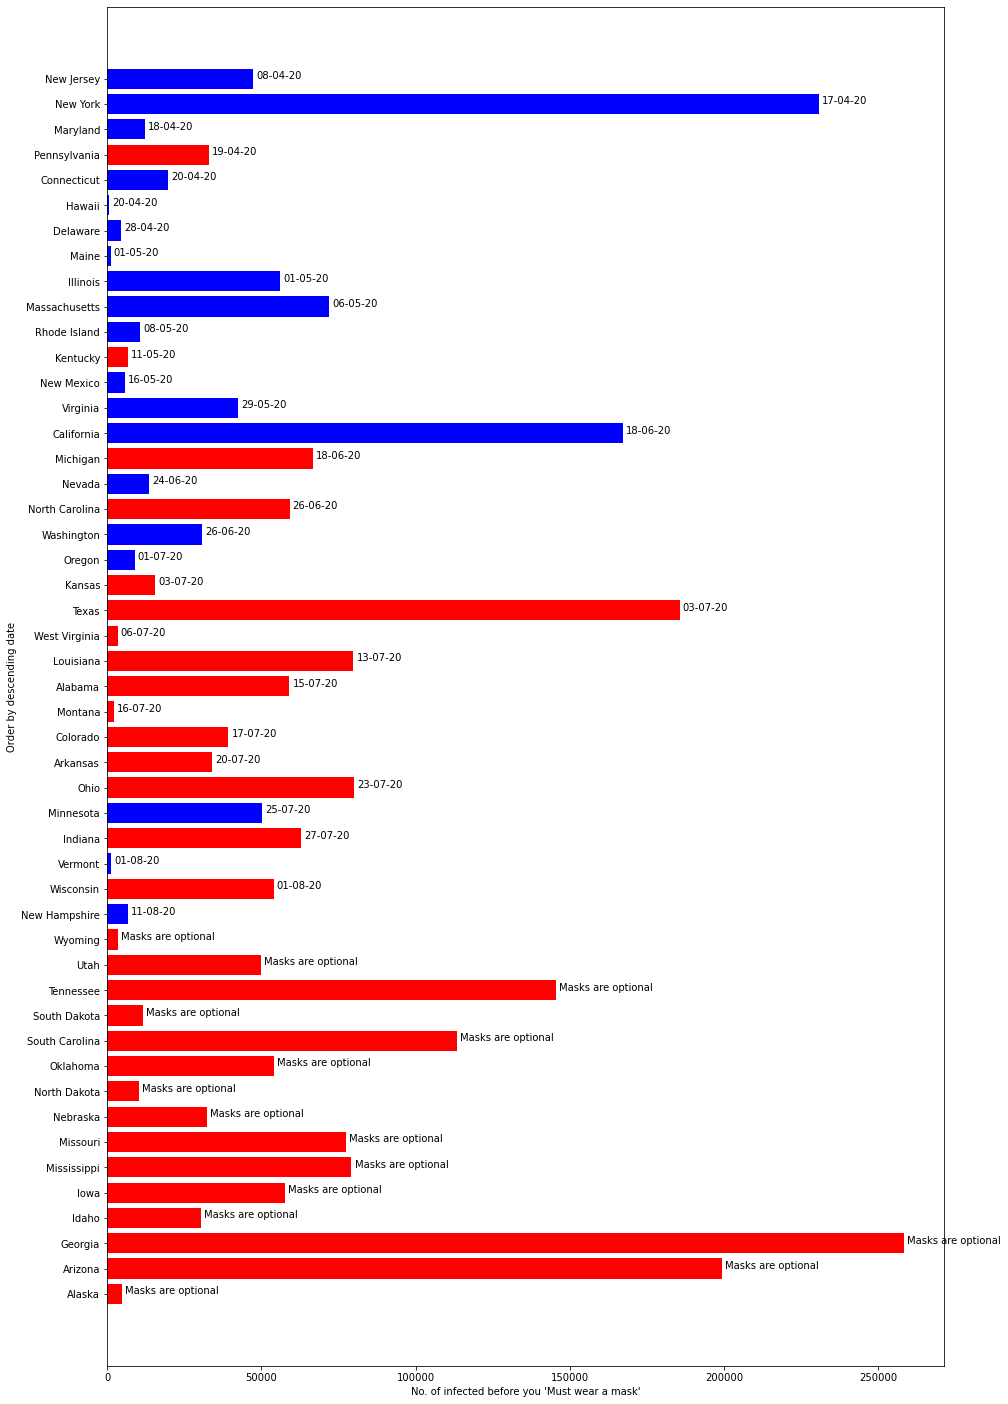

In [30]:
df = state_info.sort_values(by=['Must wear mask since'], ascending=False, na_position="first")
df.drop(df[df["State"] == "Florida"].index, inplace=True)

plt.figure(figsize=(15,25))
plt.barh(df["State"], df["Confirmed before"], color=df["Politic"])
plt.xlabel("No. of infected before you 'Must wear a mask'")
plt.ylabel("Order by descending date")

i = 0
for x in df.index:
    value = df["Confirmed before"][x]
    text = df["Must wear mask since"][x]
    if not pd.isnull(text):
        text = text.strftime("%d-%m-%y")
    else:
        text = "Masks are optional"
    plt.text(value+1000, i, text, color='black')
    i+= 1

plt.show()

Ta thấy các bang có số ca nhiễm cao nhất ở 2 đảng đối lập gần bằng nhau, như sự khác biệt quan trọng là các bang như New York, California đã bắt buộc người dân đeo khẩu trang từ sớm (tháng 4, 6) trong khi các bang nhiễm nặng ở phía Republican thì không.

Để thấy rõ hơn sự khác biệt, ta chỉ hiển thị những bang có **số lượng nhiễm > 50000** khi ban hành luật

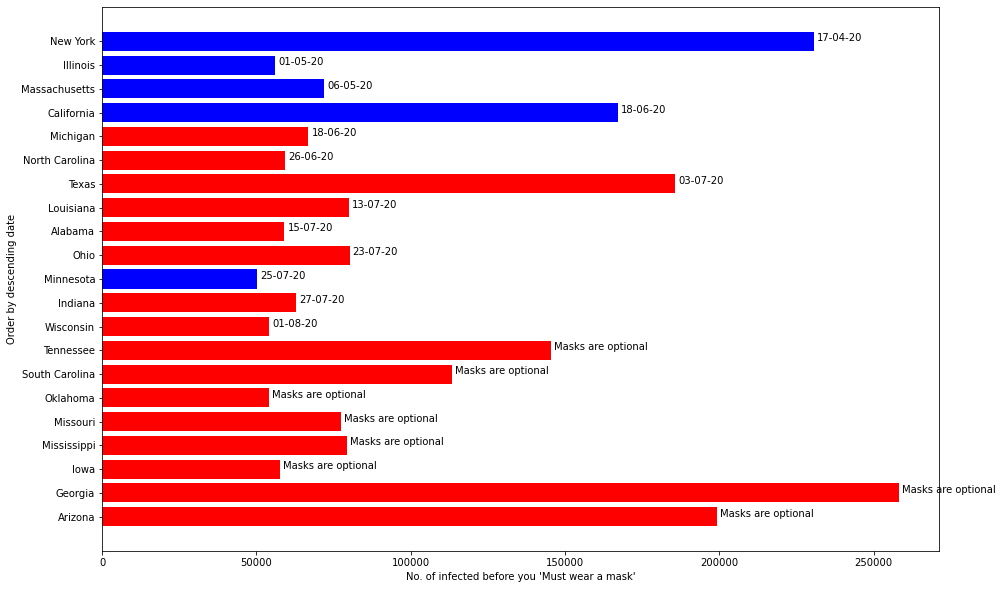

In [31]:
df = state_info.sort_values(by=['Must wear mask since'], ascending=False, na_position="first")
df.drop(df[df["State"] == "Florida"].index, inplace=True)
df.drop(df[df["Confirmed before"] <= 50000].index, inplace=True)

plt.figure(figsize=(15,10))
plt.barh(df["State"], df["Confirmed before"], color=df["Politic"])
plt.xlabel("No. of infected before you 'Must wear a mask'")
plt.ylabel("Order by descending date")

i = 0
for x in df.index:
    value = df["Confirmed before"][x]
    text = df["Must wear mask since"][x]
    if not pd.isnull(text):
        text = text.strftime("%d-%m-%y")
    else:
        text = "Masks are optional"
    plt.text(value+1000, i, text, color='black')
    i+= 1

plt.show()

Không thể chối cãi rằng những bang Republican hành động chậm trễ trước sự lây lan của covid-19

## Kết luận

- Bất ổn chính trị ở Mỹ chắc chắn có ảnh hưởng đến sự bùng phát dịch bệnh.
- Nếu như một việc đơn giản như phải đeo khẩu trang còn có chính sách khác biệt đến vậy, những vấn đề quan trọng hơn sẽ ra sao? Tại sao với số ca nhiễm cao như vậy mà biện pháp phòng ngừa đơn giản nhất còn được xem là tùy ý ở một số nơi?
- Từ đâu mà ở truyền thông lại có tin tức về những người xem thường dịch bệnh đến vô lý như đòi quyền tự do không cần đeo khẩu trang,...?

# V. Nhìn lại quá trình làm đồ án

## Khó khăn:

 - Thời gian làm đồ án có quá nhiều đồ án khác (4) chồng lên nhau, khiến thời gian tìm hiểu và làm bài bị hạn chế
 - Các chính sách giữa các đảng đối lập Mỹ có thể tổng hợp thành dữ liệu và đồng thời chỉ ra được do bất đồng quan điểm dẫn đến mức độ lây nhiễm cao khó tìm (dữ liệu cho câu 3)

## Đã học được những gì

 - Nâng cao thêm kỹ năng sử dụng thư viện pandas và matplotlib
 - Học được cách xử lí bằng code đối với dữ liệu time series (Trước đó em chỉ có thể sử dụng công cụ như Tablaeu...)

## Có thời gian thêm thì sẽ làm gì:

 - Tìm thêm dữ liệu cho câu 3, thể hiện rõ hơn và tăng tính thuyết phục của giả thuyết ban đầu
 - Tìm hiểu và thực hiện plot dữ liệu lên bản đồ, giống như sau:
 <img src="https://i.imgur.com/lGW6IvE.png">

# VI. Tài liệu tham khảo

https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

https://en.wikipedia.org/wiki/2016_United_States_presidential_election

https://edition.cnn.com/2020/06/19/us/states-face-mask-coronavirus-trnd/index.html

https://pandas.pydata.org/

https://stackoverflow.com/